# Missing Values - Feature Engineering 1

### Missing Completely at Random, MCAR:
A variable is missing completely at random (MCAR) if the probability of being missing is the same for all the observations. When data is MCAR, there is absolutely no relationship between the data missing and any other values, observed or missing, within the dataset. In other words, those missing data points are a random subset of the data. There is nothing systematic going on that makes some data more likely to be missing than other.


In [3]:
import pandas as pd

In [5]:
df=pd.read_csv('titanic.csv')

In [7]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [11]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [13]:
df[df['Embarked'].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN


### Missing Data Not At Random(MNAR): Systematic missing Values
There is absolutely some relationship between the data missing and any other values, observed or missing, within the dataset.

In [22]:
import numpy as np
df['cabin_null']=np.where(df['Cabin'].isnull(), 1, 0)
df['cabin_null'].mean()

0.7710437710437711

In [24]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'cabin_null'],
      dtype='object')

In [32]:
df.groupby('Survived')['cabin_null'].mean()

Survived
0    0.876138
1    0.602339
Name: cabin_null, dtype: float64

#### Missing At Random(MAR)
Example - Information like salary or age not revealed

### All the techniques of handling ,issing values

1. Mean/ Median/Mode replacement
2. Random Sample Imputation
3. Capturing NAN values with a new feature
4. End of Distribution imputation
5. Arbitrary imputation
6. Frequent categories imputation


### Mean/ Median/Mode imputation

In [40]:
df = pd.read_csv('titanic.csv', usecols=['Age','Fare', 'Survived'])
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [42]:
df.isnull().mean()

Survived    0.000000
Age         0.198653
Fare        0.000000
dtype: float64

In [46]:
df['Age'].mean()

29.69911764705882

In [44]:
def replace_nan(df, variable, median):
    df[variable+'_median'] = df[variable].fillna(median)

In [48]:
median = df['Age'].median()
replace_nan(df, 'Age', median)

In [54]:
df.head(10)

,Survived,Age,Fare,Age_median
0,0,22.0,7.2500,22.0
1,1,38.0,71.2833,38.0
2,1,26.0,7.9250,26.0
3,1,35.0,53.1000,35.0
4,0,35.0,8.0500,35.0
5,0,NaN,8.4583,28.0
6,0,54.0,51.8625,54.0
7,0,2.0,21.0750,2.0
8,1,27.0,11.1333,27.0
9,1,14.0,30.0708,14.0


In [56]:
print(df['Age_median'].std())
print(df['Age'].std())

13.019696550973194
14.526497332334044


In [60]:
import matplotlib.pyplot as plt
%matplotlib inline

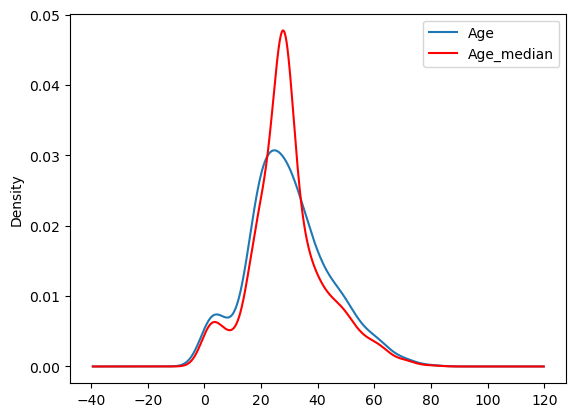

In [74]:
fig = plt.figure()
ax = fig.add_subplot(111)
df['Age'].plot(kind='kde', ax=ax)
df['Age_median'].plot(kind='kde', ax=ax, color='red')
lines, label = ax.get_legend_handles_labels()
ax.legend(lines, label, loc='best')

In [66]:
df.corr()

,Survived,Age,Fare,Age_median
Survived,1.000000,-0.077221,0.257307,-0.064910
Age,-0.077221,1.000000,0.096067,1.000000
Fare,0.257307,0.096067,1.000000,0.096688
Age_median,-0.064910,1.000000,0.096688,1.000000


#### Advantages
1. Easy to implement(Robust to outliers)
2. Faster way to obtain the complete dataset
#### Disadvantages
1. Change or Distortion in the original variance
2. Impacts Correlation

#### Random Sample Imputation
It consists of taking random observation from the dataset and we use this observation to replace the nan values
To be used when the data is missing completely at random(MCAR)

In [81]:
df=pd.read_csv('titanic.csv', usecols=['Age','Fare','Survived'])
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [83]:
df.isnull().sum()

Survived      0
Age         177
Fare          0
dtype: int64

In [103]:
df['Age'].dropna().sample(df['Age'].isnull().sum(), random_state=0)

423    28.00
177    50.00
305     0.92
292    36.00
889    26.00
       ...  
539    22.00
267    25.00
352    15.00
99     34.00
689    15.00
Name: Age, Length: 177, dtype: float64

In [107]:
df[df['Age'].isnull()].index

Index([  5,  17,  19,  26,  28,  29,  31,  32,  36,  42,
       ...
       832, 837, 839, 846, 849, 859, 863, 868, 878, 888],
      dtype='int64', length=177)

In [ ]:
df.sample

In [115]:
def impute_nan(df, variable, median):
    df[variable+'_median'] = df[variable].fillna(median)
    df[variable + '_random'] = df[variable]
    random_sample = df[variable].dropna().sample(df[variable].isnull().sum(), random_state=0)
    random_sample.index = df[df[variable].isnull()].index
    df.loc[df[variable].isnull(), variable + '_random'] = random_sample

In [119]:
impute_nan(df,'Age', df['Age'].median())

In [125]:
print(df['Age'].std())
print(df['Age_median'].std())
print(df['Age_random'].std())

14.526497332334044
13.019696550973194
14.5636540895687


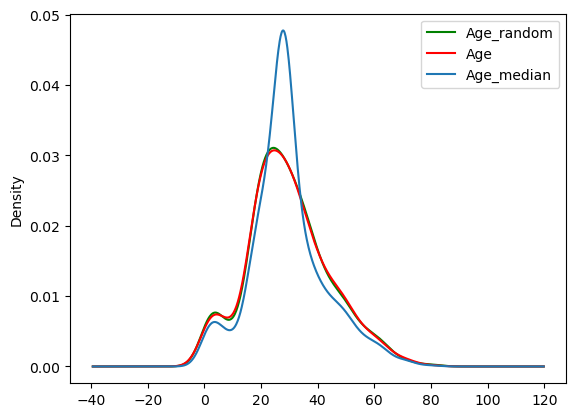

In [137]:
fig = plt.figure()
ax = fig.add_subplot(111)
df['Age_random'].plot(kind='kde', color='green', ax = ax)
df['Age'].plot(kind='kde', color='red', ax = ax)
df['Age_median'].plot(kind='kde', ax=ax)
lines, legend = ax.get_legend_handles_labels()
ax.legend(lines, legend)

##### Advantages
1. Easy To implement
2. There is less distortion in variance

##### Disadvantage
1. Randomness wont work for every situation

#### Capturing NAN values with a new feature

It works well if the data are not missing completely at random 

In [144]:
df=pd.read_csv('titanic.csv', usecols=['Age','Fare','Survived'])
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [146]:
df['Age_NAN']=np.where(df['Age'].isnull(),1,0)

In [156]:
df['Age']=df['Age'].fillna(df['Age'].median())

In [158]:
df.head(10)

,Survived,Age,Fare,Age_NAN
0,0,22.0,7.2500,0
1,1,38.0,71.2833,0
2,1,26.0,7.9250,0
3,1,35.0,53.1000,0
4,0,35.0,8.0500,0
5,0,28.0,8.4583,1
6,0,54.0,51.8625,0
7,0,2.0,21.0750,0
8,1,27.0,11.1333,0
9,1,14.0,30.0708,0


#### Advantages
1. Easy to implement
2. Captures the importance of missing values

##### Disadvantages
1. Creating Additional Features(Curse of Dimensionality)

#### End of Distribution imputation

use when values missing not at random

In [243]:
df=pd.read_csv('titanic.csv', usecols=['Age','Fare','Survived'])
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


<Axes: >

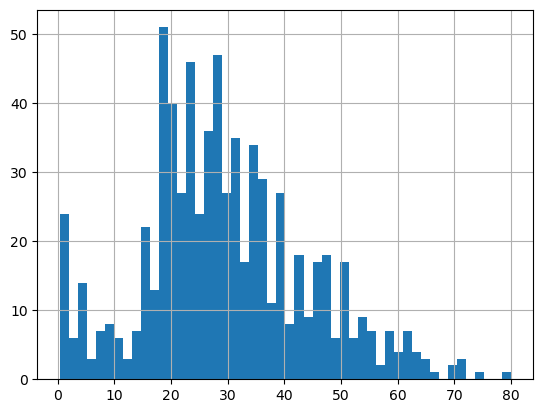

In [245]:
df['Age'].hist(bins=50)

In [247]:
extreme = df['Age'].mean() + 3*df['Age'].std()

<Axes: xlabel='Age'>

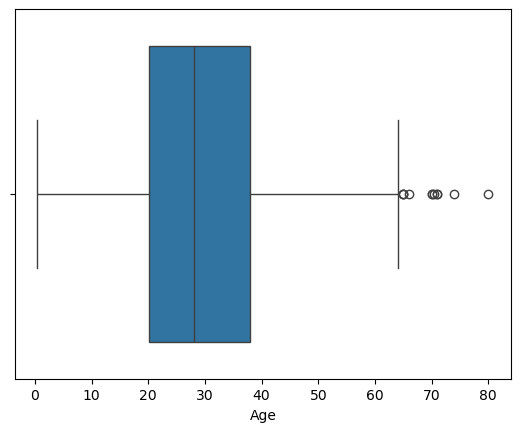

In [249]:
import seaborn as sns
sns.boxplot(x='Age', data=df)

In [251]:
def impute_nan(df, variable,median, extreme):
    df[variable+'_end_distribution'] = df[variable].fillna(extreme)
    df[variable].fillna(median, inplace=True)

In [253]:

impute_nan(df, 'Age', df['Age'].median(), extreme)

C:\Users\asus\AppData\Local\Temp\ipykernel_4552\985041891.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[variable].fillna(median, inplace=True)


In [255]:
df.head(10)

,Survived,Age,Fare,Age_end_distribution
0,0,22.0,7.2500,22.00000
1,1,38.0,71.2833,38.00000
2,1,26.0,7.9250,26.00000
3,1,35.0,53.1000,35.00000
4,0,35.0,8.0500,35.00000
5,0,28.0,8.4583,73.27861
6,0,54.0,51.8625,54.00000
7,0,2.0,21.0750,2.00000
8,1,27.0,11.1333,27.00000
9,1,14.0,30.0708,14.00000


<Axes: >

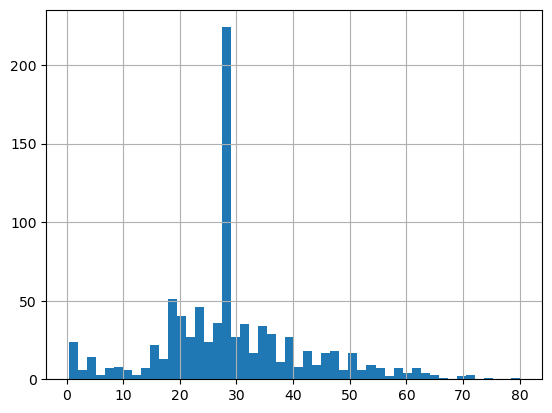

In [257]:
df['Age'].hist(bins=50)

<Axes: >

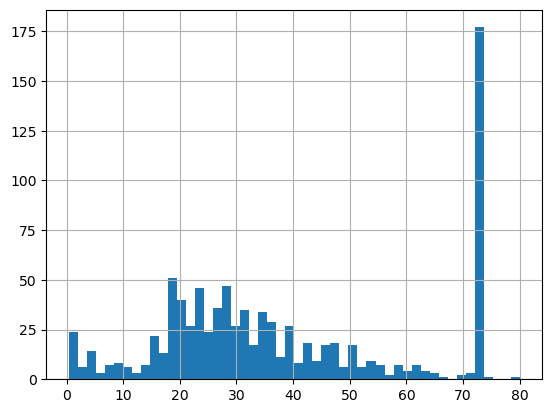

In [259]:
df['Age_end_distribution'].hist(bins=50)

In [233]:
extreme

73.27860964406095

<Axes: xlabel='Age_end_distribution'>

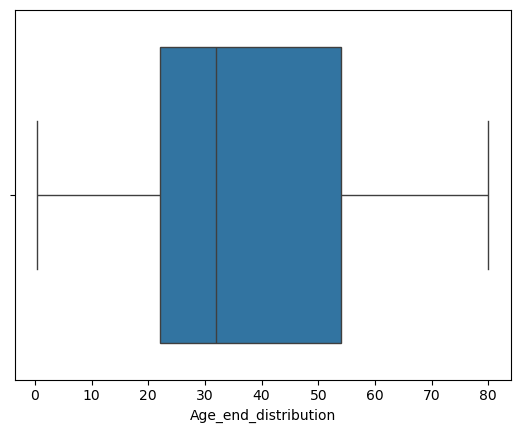

In [261]:
sns.boxplot(x='Age_end_distribution',data=df)

#### Advantages
1. Easy to implement
2. Captures the importance of missing values

##### Disadvantages
1. Distorts original distribution of the variable
2. It will mask the outliers in the distribution is the number of NA is big
3. If number os NA is small, then the replaced NA may be considered as an outlier and preprocessed in feature engineering
4. If missing is not an important, it may mask the predictive power of original variable by distorting the distribution

#### Arbitrary Value Imputation

It consists of replacing NAN by an arbitrary value

In [272]:
df=pd.read_csv("titanic.csv", usecols=["Age","Fare","Survived"])
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [274]:
def impute_nan(df, variable):
    df[variable+ '_zero'] = df[variable].fillna(0)
    df[variable+ '_hundred'] = df[variable].fillna(100)

In [278]:
impute_nan(df, 'Age')

<Axes: >

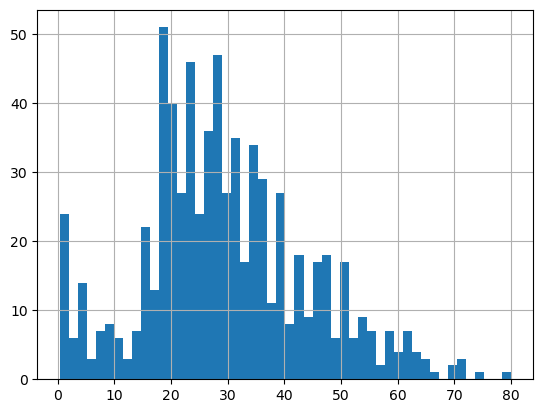

In [276]:
df['Age'].hist(bins=50)

<Axes: >

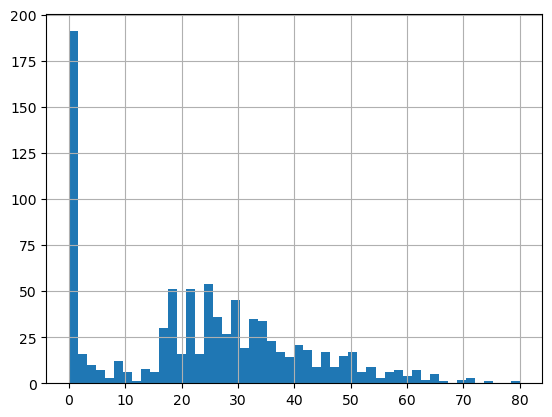

In [280]:
df['Age_zero'].hist(bins=50)

<Axes: >

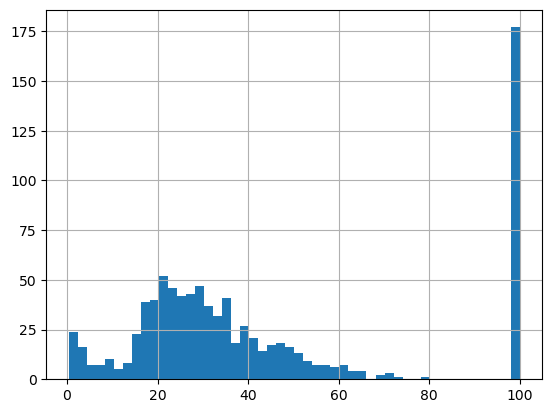

In [282]:
df['Age_hundred'].hist(bins=50)

C:\Users\asus\AppData\Local\Temp\ipykernel_4552\1315530542.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(a)


<Axes: ylabel='Density'>

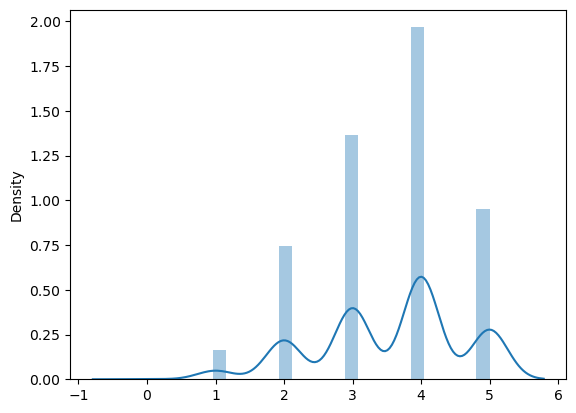

In [326]:
from scipy.stats import binom
a = binom.rvs(n=5, p=0.7, loc=0, size=1010)
import seaborn as sns
sns.distplot(a)

In [327]:
a

array([4, 5, 4, ..., 4, 4, 4], dtype=int64)

0.9012917926080696

In [385]:
head = []
def run_binom():
    for n in range(1000):
        A = [np.random.random() for i in range(10)]
        print(A)
        head.append(len([m for m in A if m >= 0.50]))
run_binom()

[0.28597380937378025, 0.6878567409042835, 0.2530911041101749, 0.05055533669722834, 0.8700507287156991, 0.9283471836303581, 0.5289038918922121, 0.5880153355853822, 0.4881767582711639, 0.22798608795957753]
[0.35258280334043446, 0.9947585747393296, 0.27077618696510564, 0.675700420505656, 0.8802935422724386, 0.12000351056393033, 0.47701075329099707, 0.419149056415677, 0.8743341498279662, 0.9555006456927975]
[0.5157350540727208, 0.05522840519701744, 0.46336762729246983, 0.5202702856506958, 0.5185793448133932, 0.7739771433507637, 0.6524440411083702, 0.7538946393117656, 0.732582744273106, 0.7636385783333118]
[0.7450586678744608, 0.691741713543828, 0.30515402803842206, 0.2175334473151027, 0.8679380106591041, 0.10494402796991853, 0.4568488000316677, 0.31885880807879974, 0.27179200746466237, 0.43092356197111914]
[0.6738586365855314, 0.2574987229960376, 0.6256356104942652, 0.2062904656969754, 0.6829756017042206, 0.6503671269867336, 0.6795271208851447, 0.02915465146512264, 0.38602916299915657, 0.4

C:\Users\asus\AppData\Local\Temp\ipykernel_4552\1791280965.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(head, bins=11, label='simulation results')


Text(0, 0.5, 'Frequency')

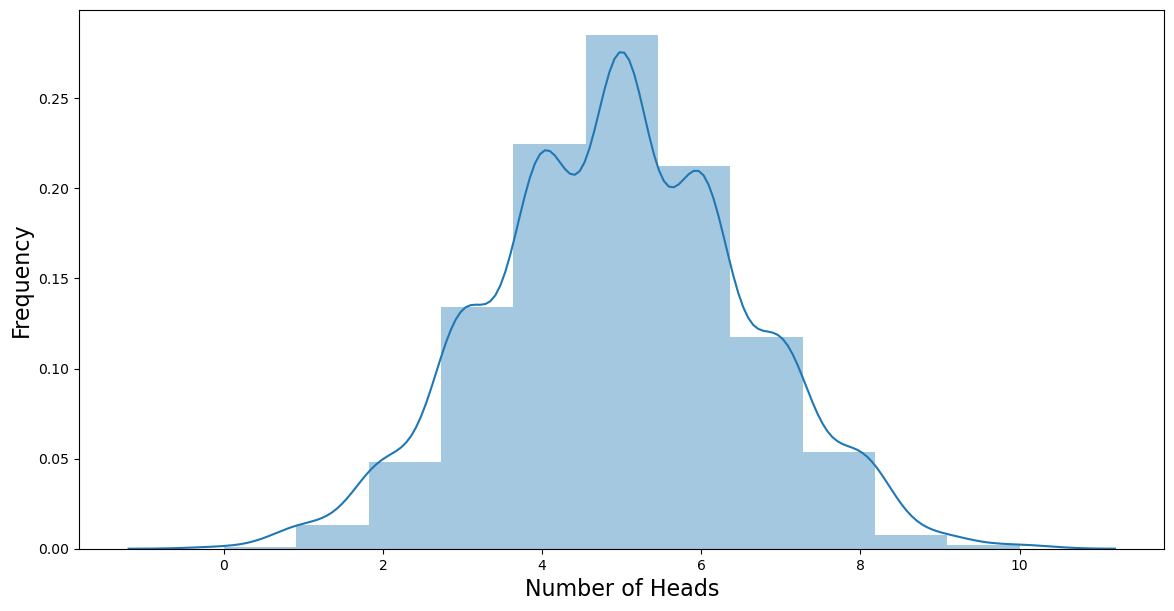

In [389]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(14,7))
sns.distplot(head, bins=11, label='simulation results')

ax.set_xlabel("Number of Heads",fontsize=16)
ax.set_ylabel("Frequency",fontsize=16)


In [391]:
sum(1 for i in np.random.binomial(10, 0.5, 10000) if i == 5)/10000

0.2507